<a href="https://www.kaggle.com/code/imharshkashyap/unemployment-analysis-of-india-with-python?scriptVersionId=149278732" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar 
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-datasets-during-covid-19/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-datasets-during-covid-19/Unemployment in India.csv
/kaggle/input/resnet-50/tensorflow2/feature-vector/1/saved_model.pb
/kaggle/input/resnet-50/tensorflow2/feature-vector/1/variables/variables.index
/kaggle/input/resnet-50/tensorflow2/feature-vector/1/variables/variables.data-00000-of-00001


In [4]:

df = pd.read_csv("/kaggle/input/unemployment-datasets-during-covid-19/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [6]:
df.info()
title = df.columns[0]

# Print the title
print(title)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
Region


In [7]:
#simply describe the data set
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
# Generate the summary statistics
stats = df.describe()

# Apply formatting options for an attractive view
styled_stats = stats.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'lightgrey')]}
]).format('{:.2f}')

# Display the styled summary statistics
styled_stats


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.00,267.00,267.00,267.00,267.00
mean,12.24,13962105.72,41.68,22.83,80.53
std,10.80,13366318.36,7.85,6.27,5.83
min,0.50,117542.00,16.77,10.85,71.19
25%,4.84,2838930.50,37.27,18.11,76.09
50%,9.65,9732417.00,40.39,23.61,79.02
75%,16.75,21878686.00,44.05,27.28,85.28
max,75.85,59433759.00,69.69,33.78,92.94


In [9]:
"""df = df.rename(columns={
    'frequency': 'state',
    'estimated unemployment rate': 'date',
    'estimated employed': 'frequency',
    'estimated labour participation rate': 'estimated unemployment rate',
    'region': 'estimated employed',
    'longitude': 'estimated labour participation rate',
    'latitude': 'region'
})"""

"df = df.rename(columns={\n    'frequency': 'state',\n    'estimated unemployment rate': 'date',\n    'estimated employed': 'frequency',\n    'estimated labour participation rate': 'estimated unemployment rate',\n    'region': 'estimated employed',\n    'longitude': 'estimated labour participation rate',\n    'latitude': 'region'\n})"

In [10]:
df.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [11]:
df.shape

(267, 9)

In [12]:
"""use this command also to find the 
df.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
df.head()"""

df.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude'],
      dtype='object')

In [13]:
#to find the null
df.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [14]:
#to find the duplication in data
df.duplicated().any()

False

In [15]:
title_txt = "State Name"
title_font= {'fontsize': 18, 'fontweight': 'bold', 'color': 'blue'}
# Print the title with padding

#print(f"{title_txt:20}",title_font)
print("\033[1m\033[34m" + title_txt + "\033[0m")
df.state.value_counts()



State Name


state
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [16]:
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [17]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [19]:
 #to delet column 
df = df.drop('month_int', axis=1)


KeyError: "['month_int'] not found in axis"

In [20]:
#to create column with name month
df['month']=df['date'].dt.month
df.head()


,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5


In [21]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="region",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month",scope='asia',template='plotly',title='Impact of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)


fig.show()

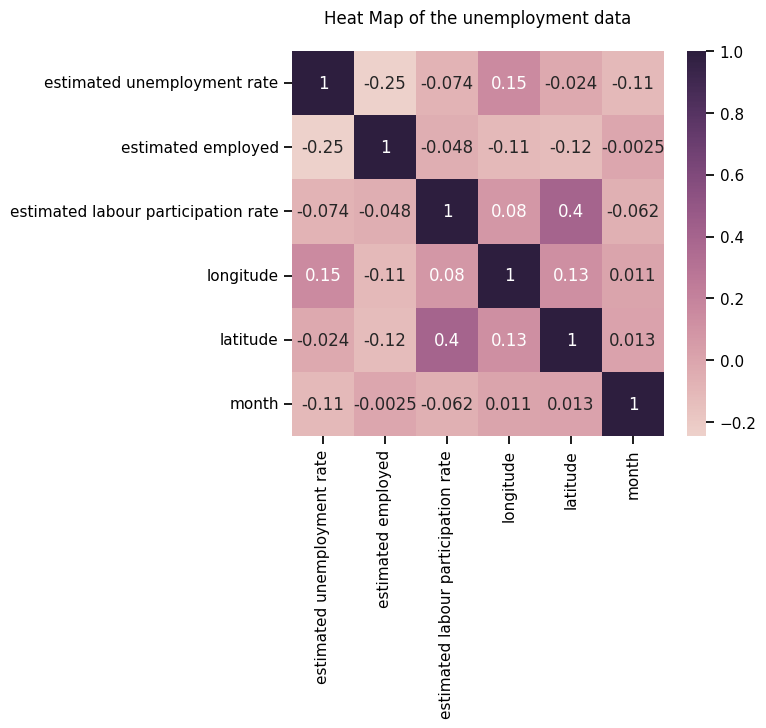

In [22]:
heatmap= df[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'longitude', 'latitude', 'month']]
heatmap = heatmap.corr()
title="Heat Map of the unemployment data"
plt.figure(figsize=(6,5))

sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(title, pad=20)
plt.show()

In [23]:
import plotly.express as px

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate'],
                        color='region',
                        color_discrete_sequence=px.colors.qualitative.Dark2)

fig.update_layout(
    title="Scatter Matrix Plot of Unemployment, Employment,\n and Labor Participation Rate",
    title_pad=dict(t=20),  # Adjust the top padding of the title
    yaxis=dict(title_standoff=20)  # Adjust the distance between the y-axis title and the plot
)

fig.show()



In [24]:
#to print column name

#Also find the data type of columns

df.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude', 'month'],
      dtype='object')

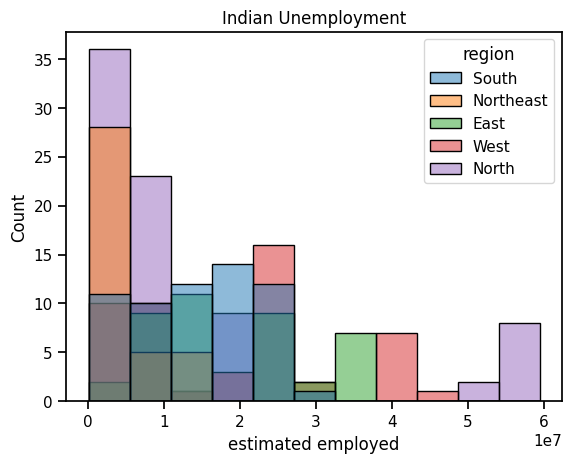

In [25]:
#The estimated number of employees according to different regions of India:
df.columns= ["state","date","frequency",
               "estimated unemployment rate","estimated employed",
               "estimated labour participation rate","region",
               "longitude","latitude","month_int"]
plt.title("Indian Unemployment")
sns.histplot(x="estimated employed", hue="region", data=df)
plt.show()

In [26]:
unemploment = df[["state", "region", "estimated unemployment rate"]]
figure = px.sunburst(unemploment, path=["region", "state"], 
                     values="estimated unemployment rate", 
                     width=700, height=700, color_continuous_scale="dark", 
                     title="Unemployment Rate in India")
figure.show()

In [27]:
import plotly.express as px

fig = px.histogram(df, x="estimated employed", color="region", title="Indian Unemployment")
fig.show()
"""Why plotly?
Because it shows informative data when click on specific data of that point of click while there is no information provided by matplotlib
"""
#Also its provide plot download option

'Why plotly?\nBecause it shows informative data when click on specific data of that point of click while there is no information provided by matplotlib\n'

In [28]:
#The unemployment rate according to different regions of India

fig=px.histogram(df, x= "estimated unemployment rate",color="region",title="Unemployment Rate in India during Covid-19")
fig.show()

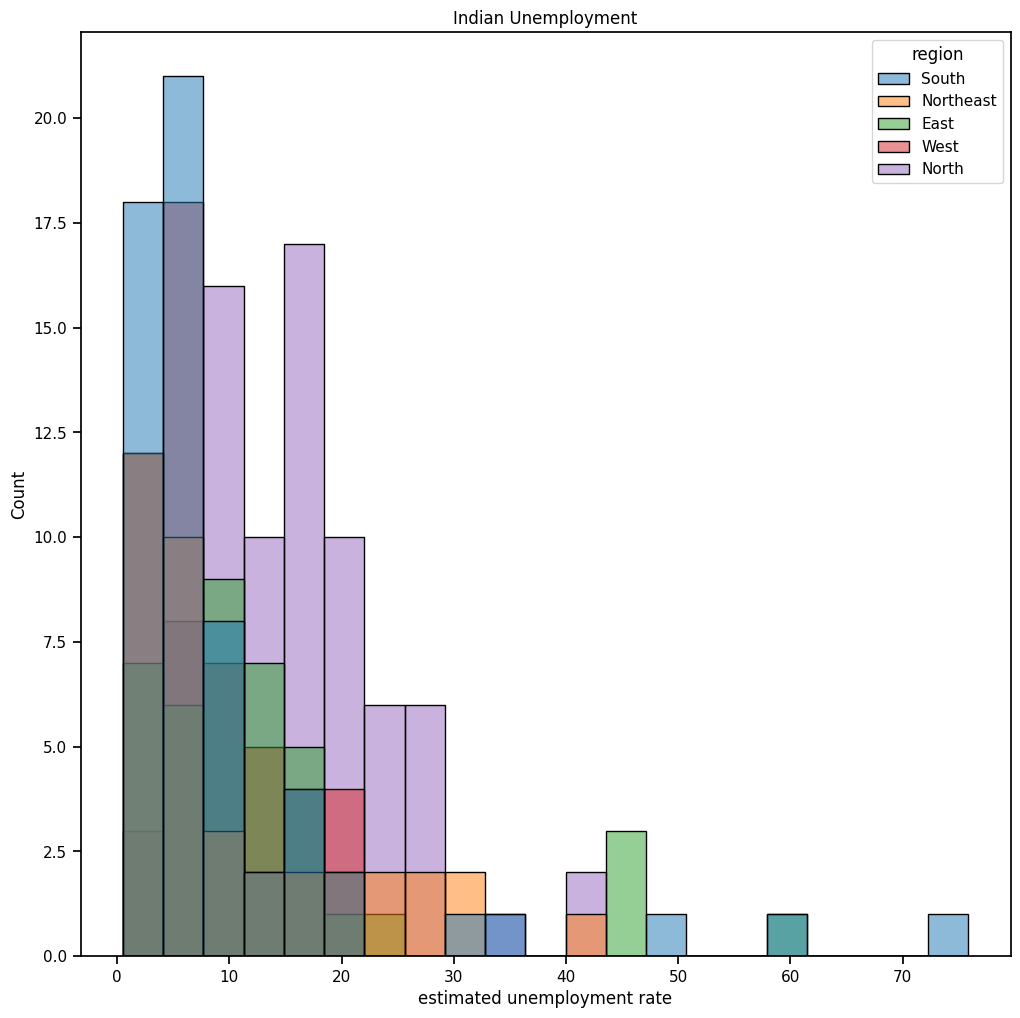

In [29]:
#The unemployment rate according to different regions of India:
plt.figure(figsize=(12, 12))
plt.title("Indian Unemployment")
sns.histplot(x="estimated unemployment rate", hue="region", data=df)
plt.show()

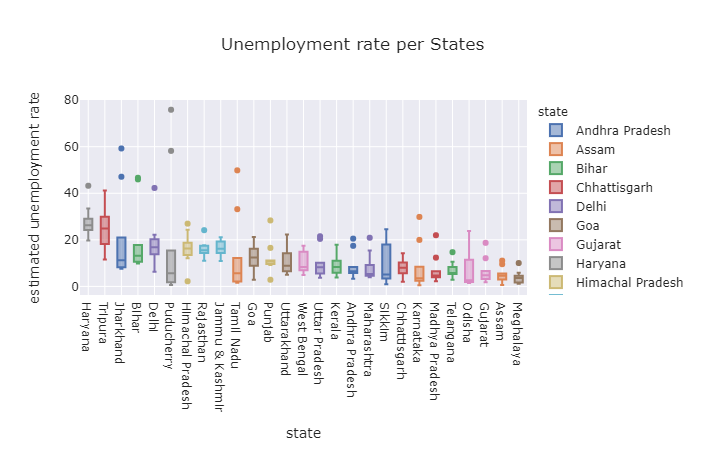

In [31]:
#plt.savefig('interns_plot.png')  # Save the plot as an image file

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
#Boxplot of Unemployment rate per States
fig = px.box(df, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

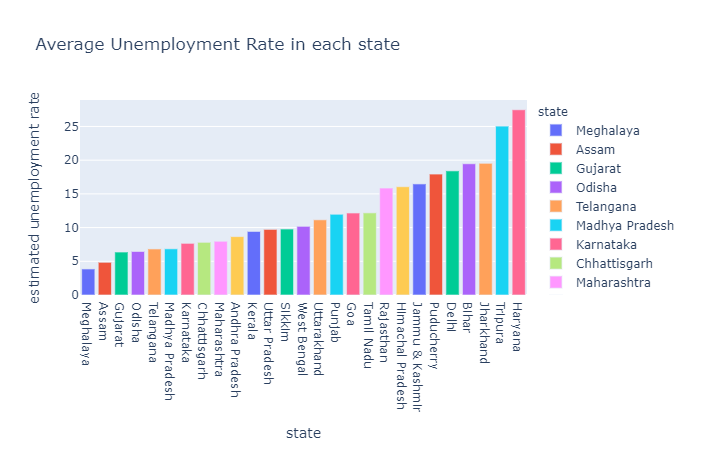

In [32]:
plot_ump = df[['estimated unemployment rate', 'state']]
data_unemp = plot_ump.groupby('state').mean().reset_index()
data_unemp = data_unemp.sort_values('estimated unemployment rate')
fig = px.bar(data_unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

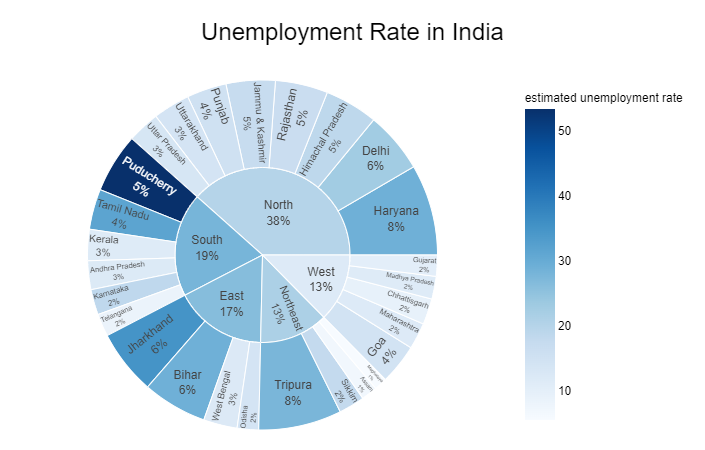

In [33]:
import plotly.express as px

# Create a subset of the DataFrame with relevant columns
unemployment = df[["state", "region", "estimated unemployment rate"]]

# Create the sunburst plot
fig = px.sunburst(unemployment, path=["region", "state"], values="estimated unemployment rate",
                  color="estimated unemployment rate", color_continuous_scale="Blues",
                  title="Unemployment Rate in India")

# Customize the appearance
fig.update_traces(textinfo="label+percent entry")
fig.update_layout(
    title_font=dict(size=24),
    title_x=0.5,
    margin=dict(l=20, r=20, t=80, b=20),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family="Arial", size=12, color="black")
)

# Show the plot
fig.show()


In [39]:
#between 
after_lockdown = df[df['month'].between(4, 6)]
before_lockdown = df[df['month'].between(1, 4)]

KeyError: 'month'

In [40]:
af_lockdown=after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown= before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns=['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,9.4025,13.750000
1,Assam,6.2250,7.070000
2,Bihar,20.7425,36.806667
3,Chhattisgarh,7.2450,9.380000
4,Delhi,17.6975,25.713333


In [43]:
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

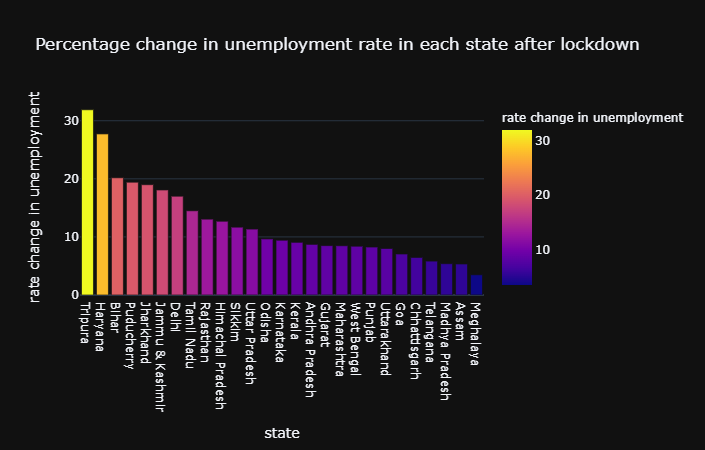

In [44]:
fig = px.bar(lockdown, x='state', y='rate change in unemployment', color='rate change in unemployment',
             title='Percentage change in unemployment rate in each state after lockdown', template='plotly_dark')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [45]:
"""Here are some other template names you can use in Plotly:

- `'plotly'`: The default Plotly template.
- `'plotly_white'`: A white background template.
- `'plotly_dark'`: A dark background template.
- `'ggplot2'`: A template that mimics the style of the ggplot2 library in R.
- `'seaborn'`: A template that mimics the style of the seaborn library in Python.
- `'simple_white'`: A simple white background template.
- `'none'`: A template with no background or gridlines.

You can choose the template that best suits your visualization needs by setting the `template` parameter in the `px.bar()` function."""

"Here are some other template names you can use in Plotly:\n\n- `'plotly'`: The default Plotly template.\n- `'plotly_white'`: A white background template.\n- `'plotly_dark'`: A dark background template.\n- `'ggplot2'`: A template that mimics the style of the ggplot2 library in R.\n- `'seaborn'`: A template that mimics the style of the seaborn library in Python.\n- `'simple_white'`: A simple white background template.\n- `'none'`: A template with no background or gridlines.\n\nYou can choose the template that best suits your visualization needs by setting the `template` parameter in the `px.bar()` function."